In [33]:
import os 
import matplotlib.pyplot as plt 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tqdm import tqdm
from PIL import Image
import math

In [34]:
print( os.getcwd())
path = './FaceShape Dataset/'
train_path = './FaceShape Dataset/training_set'
x_val = []
y_val = [] 
for dir in os.listdir( train_path ):
    dir_path = os.path.join( train_path,dir )
    print(dir_path)
    x_val.append( dir )
    y_val.append ( len( os.listdir( dir_path ) ) )
print(x_val , y_val)

/home/himanshu/Documents/SELF
./FaceShape Dataset/training_set/Square
./FaceShape Dataset/training_set/Round
./FaceShape Dataset/training_set/Oval
./FaceShape Dataset/training_set/Oblong
./FaceShape Dataset/training_set/Heart
['Square', 'Round', 'Oval', 'Oblong', 'Heart'] [799, 800, 800, 799, 799]


<BarContainer object of 5 artists>

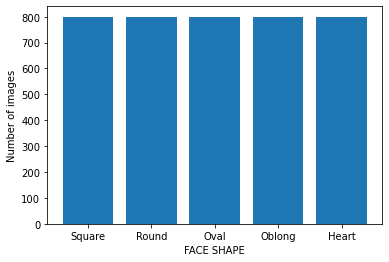

In [35]:
plt.xlabel('FACE SHAPE')
plt.ylabel('Number of images')
plt.bar(x_val,y_val)

In [36]:
Y_Val = y_val
X_Val = x_val
img_height = 299 
img_width = 299 
img_size = ( img_width , img_height )
# image_size= img_size

In [37]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

class_size = 3000

src_train_dir=os.path.join(path,'training_set')
dest_train_dir=os.path.join(path,'training_set_aug')
it=0
for count in Y_Val:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,X_Val[it])
    src_lab_dir=os.path.join(src_train_dir,X_Val[it])
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

799 1598
800 1600
800 1600
799 1598
799 1598


In [40]:
###Revisualising 
path = './FaceShape Dataset/'
train_path_aug = './FaceShape Dataset/training_set_aug'
new_x = [] 
new_y = [] 
for dir in os.listdir( train_path_aug ):
    dir_path = os.path.join( train_path_aug,dir )
    print(dir_path)
    new_x.append( dir )
    new_y.append ( len( os.listdir( dir_path ) ) )
print(new_x , new_y)



./FaceShape Dataset/training_set_aug/Square
./FaceShape Dataset/training_set_aug/Round
./FaceShape Dataset/training_set_aug/Oval
./FaceShape Dataset/training_set_aug/Oblong
./FaceShape Dataset/training_set_aug/Heart
['Square', 'Round', 'Oval', 'Oblong', 'Heart'] [1469, 1486, 1490, 1483, 1483]


<BarContainer object of 5 artists>

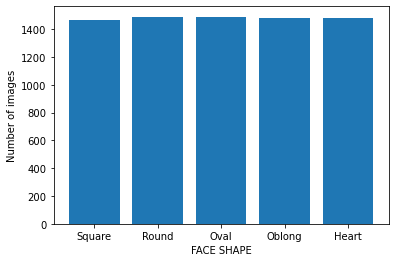

In [41]:
plt.xlabel('FACE SHAPE')
plt.ylabel('Number of images')
plt.bar(new_x,new_y)